
<h1> Introduction </h1>
    <p> 
    Starting a new business for each investor may seem hard at first. One reason behind this is the risk associated with the dicision the investor makes. A significant portion of this risk is usually raised because the investor thinks no matter what business he starts, he will be outcompeted by those who are already experienced in that business. This concern can be overcomed if the investor finds out that for a special business the demand is more than the supply. In this project we assume there is an investor in China who is willing to open a food store, if we can convince him that he wont be outcompeted by other businesses around. 
    </p>
    <h2> Business questions: </h2>
        <ol>
            <li>
            Which city is the best city to open a food store in? 
            </li>
             <li>
            Which type of food store is the most probable to be successful?
            </li>
        </ol>  

<h1> Data </h1>
    <p>In this project the following dataset were collected and used:</p>
        <ol>
    <p> </p>
        <a href = "https://github.com/MoeinJahanbani/Coursera_Capstone/blob/master/finalProject/listingAllProvinces%26IncludingCities.ipynb">
            <li>Coordinate data of Chinese cities and their districts/counties</li></a>
    <a href = "https://github.com/MoeinJahanbani/Coursera_Capstone/blob/master/finalProject/chinaCitiesAndPopulation.ipynb">
            <li>Population data of Chineese cities</li></a>
    <a href = "https://github.com/MoeinJahanbani/Coursera_Capstone/blob/master/finalProject/chinaCitiesGDP.ipynb">
            <li>GDP data of Chineese cities</li></a>
             <a href=https://github.com/MoeinJahanbani/Coursera_Capstone/blob/master/finalProject/AddingVenuesToEachCity.ipynb>  
               <li>Location data of food stores</li></a>
        </ol>
    </p>In the following a summerized information about each dataset is given.</p>
    <h3>Coordinate data of Chinese cities and their districts/counties</h3>
        <p>
        First I obtained the list of Chinese provinces from <a href=" https://en.wikipedia.org/wiki/Provinces_of_China">here</a>
       ; afterwards, I used the following website to obtain the name of cities and their districts in each
        province:
     </p>
            https://www.travelchinaguide.com/essential/area_zip/{}.htm
            <p>
        where instead of {} the name of each province should be placed.
        Then, I used Python, geocoder module to translate the addresses into coordinates.
        </p>
    <h3>Population data of Chineese cities</h3>
        <p>
        I used <a href=" https://en.wikipedia.org/wiki/List_of_cities_in_China_by_population"> this</a> wikipedia page to retrieve the population of major chinese cities.
        </p>
    <h3>GDP data of Chineese cities</h3>
    <p>
        The GDP per capita data of different Chineese provinces were obtained from <a href="https://theslittyeye.wordpress.com/2018/03/26/2017-top-50-chinese-cities-gdp-nominal-per-capita-raw-data-compiling/">here</a>:
    </p>
    <h3>Location data of food stores</h3>
        <p>
        We used the explore endpoint of foursquare to retrieve different category of food stores that exist in 
        each city. Note that given the coordinate of each city/neighbourhood, and a specified radius, foursquare
        doesn't return all of the venues, but a selection of them. Therefore, if one set the radius 500 m, and 
        foursquare returns venue A, if he changes the radius to 5000, it may return  venues B and C. Therefore, 
        for each city we used a series of radius and removed the overlaps so that we ensure we have retrieved as
        many venues as possible.
        </p>

<h1> Methodology</h1>
    <p>
        In summery, this project follows two following hypotheses, first to find out which city is the best city 
        to open a food store in, and second to find out which category of food store will be the likliest to be
         profitable.
   </p>
   <ol>
        <li>The potential revenue of each restaurant in a city is directly proportional to the population of that city and 
            the income of its citizens (demand), and reversly proportional to the number of food stores present 
            in that city (supply).
        </li>
        

No handles with labels found to put in legend.


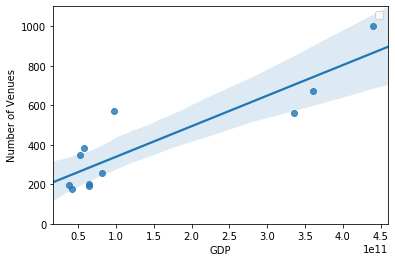

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
SuccessIndexData = pd.read_csv('SuccessIndexData.csv')
%matplotlib inline
ax = sns.regplot((SuccessIndexData['GDPpc(USD)']*SuccessIndexData['Population']).values,SuccessIndexData['nVenues'])
plt.xlabel('GDP')
plt.ylabel('Number of Venues')
plt.ylim([0,1100])
ax.legend()
plt.show()

<ol start=2>
<p> As you see there is a linear relationship between GDP and number of venues in each city. Cities that are below the line have a lower number of venues relative to their GDP. The best city to open a new food store is the city that has the maximum deviation from this linear relationship and is below the line.
</p>
<li>
            The likilihood that a specific type of food store be profitable in a specific city depends on how 
            popular it is for Chineese people (demand), and also how many food stores of that type is already 
            (supply) present. 
        </li>
   </ol>
   <p>
    Based on the first hypothesis we define the following city success index which gives a score between 1 to 10 to each city, 
    where the city with the score 10 has the most probable and the city with 
    score 1 has the least probable demand for a new food store. 
   </p>
   
$$
\large
S_{city} = 9 \times{\frac{PIPV - min(PIPV)}{max(PIPV) - min(PIPV)}} + 1
$$
  <p>
        Where $S_{city}$ is the success score of a city and is obtained based on its Person Income Per Venue
         (PIPV), relative to the cities with the highest and the lowest PIPVs. PIPV is calculated through the
          following equation:
    </p>
    
   <p>
$$
    \large
    PIPV = \frac{{population}\times{income}}{n}
$$
    </p>
   <p>
    where income is the GDP per capita for each city and n is the total number of different food stores that
     exsist in a city.
    </p>
    <p>
    Knowing which city has the most demand for a new food store, we can define the <i> type </i> success index based on the second hypothesis to determine which category of food store most probably has the highes demand and therefore makes the most profit. 
    </p>
        $$S_{type} = \frac{popularity - supply}{popularity}$$
        
        
   <p>
                This index has two parameters. Popularity represents the portion of Chineese for whom <i> type </i> is the favorite type of food store.
                 As it was said before, the number of venues of the same type in 
                other cities relative to the total number of their venues is considered to represent how popular 
                is a specific type of food store. Lets say we want to caluclate the $S_{type}$ in city j
    
   </p>

   
$$\large popularity = \frac{\sum_{i=cities,\, excluding\,j}^{}{x_{i}}}{\sum_{i=cities,\, excluding\,j}^{}{X_{i}}}$$          
   <p>
    
   where $x_{i}$ is the number of food stores of <i>type</i> category and $X_{i}$ is the total number of food stores in the city i.
    </p>
   <p>
   The second parameter shows how much is the supply of that type of food store in the city J and its defined as:
       </p>
    <p>
$\large supply = \frac{x_{j}}{X_{j}}$
</p>
    <p>
        If the index is negative, it shows that the supply is more than 
           demand and the opposit holds true if the index is posetive. Therefore, the food store kind with 
                the highest index is probable to be the the best choice for the investment. Note to the similarity of the supply and the popularity terms. Indeed, for a type, we have assumed that the average supply in other cities is equal to the popularity.
    </p>

   
 
   

<h2> Assumptions made to answer the business questions: </h2> 
            <ul> 
                <li>The food stores data available is representative of food stores in china</li>
                     <p>
                        Not all of the food stores in China exsist in the dataset we use. However, we assume the same
                        pertion of different categories has been reported (i.e. the same portion of each category is 
                         missing in our data set. Therefore, even though the data set is not complete, it is 
                         representative.
                     </p>
                <li>The size of food stores are simillar</li>
                    <p>
                        Maybe one fast food store in one city is bigger than another fast food store in another city.
                        However, one average, we assume that all of the food stores in the dataset have the same size 
                        and can handle the same number of customers.
                    </p>
                <li>People in different regions have a similar average preference</li>
                    <p>
                      We ignore the fact that people in different regions of China may like different cousines. Forexample, people in the south of China may like more chili food while the northerners may like the opposite.
                    </p>
         <li>Average supply is equal to popularity</li>
    <p>Average supply for a type of food store has been formed based on the demand or preference of people, so the average supply can represent popularity of that type</p>

   <p> <font color="red"> The python code to analyze the data based on the described methodology is available in <a href= "https://github.com/MoeinJahanbani/Coursera_Capstone/blob/master/finalProject/analyzingVenues.ipynb"> this </a>GitHub repasitory </p>
  

<h1>Results and Discussions</h1>

<p>Based on the results Shenyang showed to has the highest demand for a new food store. Considering the popularity of different food stores in other provinces and the relative frequency of food stores in Shenyang, Asian restaurant was determined to be the best choice to invest in.</p>
<p>
Even though opening an Asian restaurant in Shenyang showed to be the best choice, other cities and/or category of food stores showed a close success probability. In the following map you can see the success score of each city and its recommended food store category. 
</p>

In [2]:
import folium
import numpy as np
from pandas.io.json import json_normalize
from matplotlib import cm
from matplotlib import colors
location = [35.86,104.19] #Coordinates of China
map_cities = folium.Map(zoom_start=4,location=location)
SuccessIndexData = pd.read_csv('SuccessIndexData.csv')
x = np.arange(SuccessIndexData.shape[0])
colors_array = cm.rainbow(np.linspace(0,1,len(x)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
marker_colors = []
for i in SuccessIndexData.iterrows():
    
        
        
    popup = ("City name: {name}<br>"
    "City success score: {score}<br>"
        "Best food store choice: {best}<br>").format(name=i[1]['City'],score=str(i[1]['Success']),best=i[1]['Best Venue'])
    label = folium.Popup(popup)
    folium.CircleMarker([i[1]['Latitude'],i[1]['Longitude']],
                        radius = 5,
                        popup = label,
                        color = rainbow[i[0]],
                        fill = True,
                        fill_color = rainbow[i[0]],
                        fill_opacity = 0.7,
                       ).add_to(map_cities)
map_cities


<h1> Conclusion </h1>
<p>
This report shows that location data is a good tool in order to identify the best opportunities when it comes to opening a new business, or at least to reduce the uncertainties when there is a lack of data. The methodology introduced in this work can be extended to any other country and for any other category of business. It is trivial that when there is an appropriate data, it can be substituted by assumptions made in this work.
</p>